In [1]:
import pyproj

pyproj.CRS.from_user_input('+proj=tmerc +lat_0=0 +lon_0=108 +k=1 +x_0=500000 +y_0=0 +ellps=IAU76 +units=m +no_defs')

<Projected CRS: +proj=tmerc +lat_0=0 +lon_0=108 +k=1 +x_0=500000 + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on IAU 1976 ellipsoid
- Ellipsoid: IAU 1976
- Prime Meridian: Greenwich

In [2]:
pyproj.CRS.from_user_input(2381)

<Projected CRS: EPSG:2381>
Name: Xian 1980 / 3-degree Gauss-Kruger CM 108E
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: China - onshore between 106°30'E and 109°30'E.
- bounds: (106.5, 18.19, 109.51, 42.47)
Coordinate Operation:
- name: 3-degree Gauss-Kruger CM 108E
- method: Transverse Mercator
Datum: Xian 1980
- Ellipsoid: IAG 1975
- Prime Meridian: Greenwich

In [3]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 利用name字段选择中国区域
china = world.loc[world['name'].isin(['China', 'Taiwan'])]
china

C:\Program Files\Python37\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
140,23508428,Asia,Taiwan,TWN,1127000.0,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."


查看其crs属性即为其对应CRS，为WGS84对应的EPSG:4326，在当前的CRS下将其绘制出来：

In [4]:
china.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

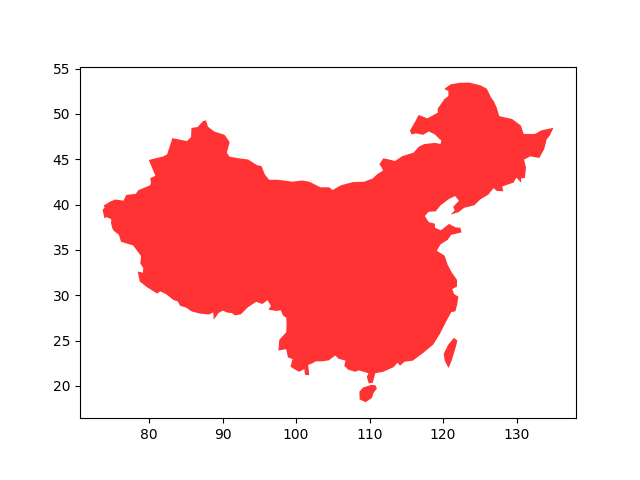

In [5]:
%matplotlib widget

china.plot(color='red',alpha=0.8)

利用to_crs()将其再投影到EPSG:2381并进行绘制：

<AxesSubplot:>

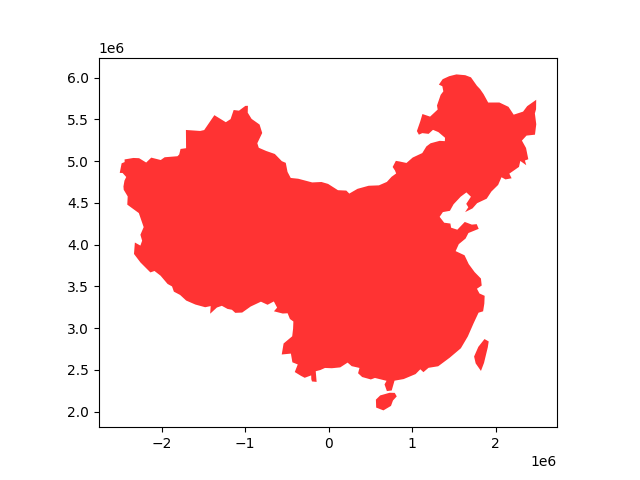

In [6]:
china.to_crs(crs='EPSG:2381').plot(color='red',alpha=0.8)

基于此创建只包含一个点的GeoSeries，尝试将其与EPSG:2381下的中国地图一同绘制：

(array([-3000000., -2000000., -1000000.,        0.,  1000000.,  2000000.,
         3000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

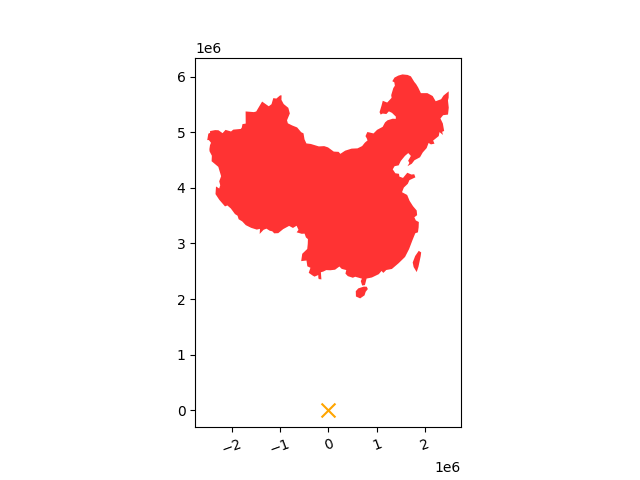

In [7]:
from shapely import geometry
import matplotlib.pyplot as plt

cq = gpd.GeoSeries([geometry.Point([106.561203, 29.558078])],
              crs='EPSG:4326')

fig, ax = plt.subplots()
china.to_crs(crs='EPSG:2381').plot(ax=ax, color='red', alpha=0.8)
cq.plot(ax=ax, color='orange', markersize=100, marker='x')
plt.xticks(rotation=20)

可以看出我们创建在重庆境内的点并没有绘制在正确的位置，接下来我们对cq进行再投影，再尝试将其与EPSG:2381下的中国绘制在一起：

(array([-3000000., -2000000., -1000000.,        0.,  1000000.,  2000000.,
         3000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

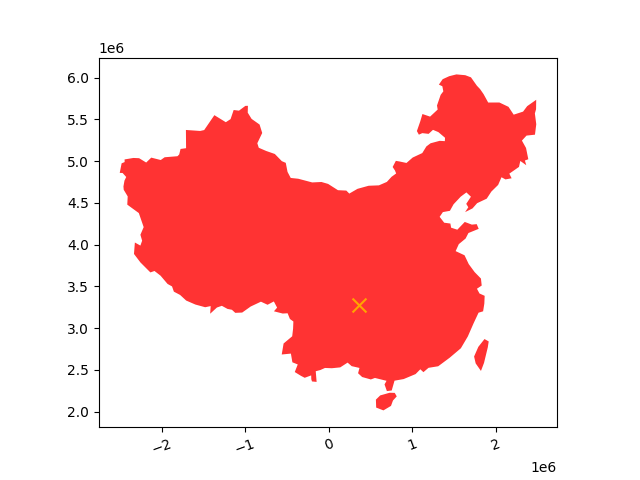

In [8]:
fig, ax = plt.subplots()
china.to_crs(crs='EPSG:2381').plot(ax=ax, color='red', alpha=0.8)
# 先再投影到EPSG:2381
cq.to_crs(crs='EPSG:2381').plot(ax=ax, color='orange', markersize=100, marker='x')
plt.xticks(rotation=20)

这时我们定义的点被绘制到正确的位置。

同样地，可以在投影后计算更为准确的面积，这里举一个粗糙的例子（实际计算国土面积不会这样粗糙），以中国中轴线东经104.19度最靠近的105度经线对应的EPSG:2380为CRS计算面积：

In [9]:
china.to_crs(crs='EPSG:2380').area.sum()

9802084047062.387

In [10]:
china.area.sum()

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


957.6785537419752